In [1]:
#from __future__ import print_function
#from gams import *
#import random
import numpy as np
#import time
import pandas as pd
#import os
#import math
#import seaborn as sns
import matplotlib.pyplot as plt
#from ncpol2sdpa import flatten
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
PO=pd.read_csv('ParetoOptimal.csv', header=0)

x=PO["Intra_Fair4"]
y=PO["Inter_Fair3"]

KDD=PO[PO["lam2"]==0]
FAIR=PO[PO["lam2"]!=0]
FAIR1=PO[PO["lam2"]>0.05]
FAIR4=PO[PO["lam2"]>0.35]
FAIR7=PO[PO["lam2"]>0.65]

x_kdd=KDD["Intra_Fair4"]
y_kdd=KDD["Inter_Fair3"]

x_fair=FAIR["Intra_Fair4"]
y_fair=FAIR["Inter_Fair3"]

x_fair1=FAIR1["Intra_Fair4"]
y_fair1=FAIR1["Inter_Fair3"]

x_fair4=FAIR4["Intra_Fair4"]
y_fair4=FAIR4["Inter_Fair3"]

x_fair7=FAIR7["Intra_Fair4"]
y_fair7=FAIR7["Inter_Fair3"]

In [3]:
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]    
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [4]:
PF=pareto_frontier(x,y,maxX = False, maxY = False)

x_pareto = PF[0]
y_pareto = PF[1]

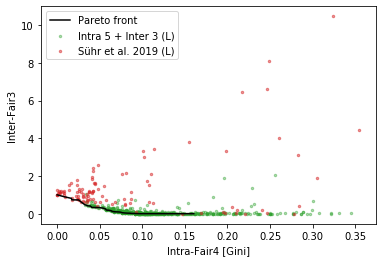

In [20]:
plt.scatter(x_fair,y_fair,alpha=0.4,s=6,c='tab:green') #turquoise
plt.scatter(x_kdd,y_kdd,alpha=0.5,s=6,c='tab:red')
plt.plot(x_pareto, y_pareto, color='black',linestyle='-',linewidth=1.5) #magenta
#,marker='s',markerfacecolor='none',markersize=3,alpha=1
plt.xlabel('Intra-Fair4 [Gini]')
plt.ylabel('Inter-Fair3')
plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
#plt.show()
plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

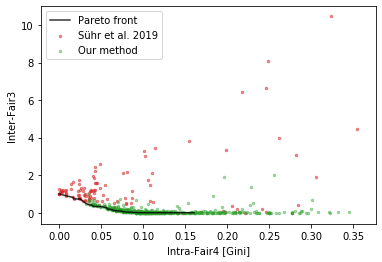

In [35]:
plt.scatter(x_kdd,y_kdd,alpha=0.5,s=6,c='tab:red')
plt.scatter(x_fair,y_fair,alpha=0.4,s=6,c='tab:green') #turquoise
#plt.scatter(x_fair4,y_fair4,alpha=0.4,s=4,c='tab:cyan') #turquoise
#plt.scatter(x_fair7,y_fair7,alpha=0.3,s=2,c='tab:purple') #turquoise
plt.plot(x_pareto, y_pareto, color='black',linestyle='-',linewidth=1.5,alpha=0.8) #magenta
#,marker='s',markerfacecolor='none',markersize=3,alpha=1
plt.xlabel('Intra-Fair4 [Gini]')
plt.ylabel('Inter-Fair3')
plt.legend(('Pareto front', 'Sühr et al. 2019', 'Our method','Our method4','Our method7'), loc='upper left')  
#plt.show()
plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')